In [1]:
import numpy as np
from typing import Optional, Tuple
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import find_peaks
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib widget

# Exercise 2: **Polarization**

*Explain and visualize the diﬀerent possibilities for polarization of an electromagnetic wave (linear-, circular-, elliptic-polarization) as presented in Chapter 2.3*

The polarization of an electromagnetic wave describes the orientation of the electric field vector. This electric field vector is the sum of two contributions. Assume an EMW with $\vec{k} = k\hat{e}_z$, then the electric field vector can be written as:

$\vec{E}(t) = \vec{E}_x \cdot \cos\left(\omega t\right) + \vec{E}_y \cdot \cos\left(\omega t + \phi\right)$

*Note, the position dependency has been dropped here, as the time dependency is sufficient to understand the phenomenon of polarization and further because it simplifies the problem.*

The first term describes the oscillating electric field part in $x$-direction, the second in $y$-direction. Depending on the phase offset $\phi$ between the two oscillating electric field parts, the polarization of the emw is different.

There are three different types of polarization:
* linear: $\phi = n \cdot \pi$, with $n \in \mathbb{Z}$
* circular: $\phi = \dfrac{\pi}{2} + n \cdot \pi$, with $n \in \mathbb{Z}$
* elliptical: $\phi \neq n \cdot \pi$, with $n \in \mathbb{Z}$

## 2.1 Why is it meaningful to specify the polarization of an electromagnetic wave?
* The polarization of an emw is meaningful, because it describes the orientation of the electric field vector (and thus the magnetic field vector, too)
* When detecting an incident emw, knowledege of its polarization is important to understand how or if it will interact with the detector
* When an emw interacts with matter (e.g. refraction, reflection, ...) its polarization changes. If the initial poalrization is known, parts of the signal which correspond to interaction with matter can be identified and thus the material can be characterized
* Polarization is a fundamental porperty of an emw, just as amplitude or phase. Thus, it is important to know the polarization of an emw to fully understand it

## 2.1.1 Why is this not meaningful when talking about sound-waves?
* Sound-waves are longitudinal waves, meaning that the oscillation is in the direction of propagation. Thus, the oscillation is not in a plane, but rather in a line. Thus, the concept of polarization is not meaningful for sound-waves.


## 2.2 Which parameters can be used to characterize the state of polarization of a wave?
* The state of polarization of an emw can be characterized by the amplitude and phase of the oscillating electric field parts in $x$- and $y$-direction, i.e. $\vec{E}_x$, $\vec{E}_y$ and $\phi$.


## 2.3 Is the state of polarization important when talking about interference-eﬀects between two waves?
* Yes, the state of polarization is important when talking about interference effects between two waves. Interference only occurs when the two waves have the same polarization. If the two waves have different polarization, they do not interfere.

interactive(children=(FloatSlider(value=0.0, description='Time [s]', max=62.83185307179586), FloatSlider(value…

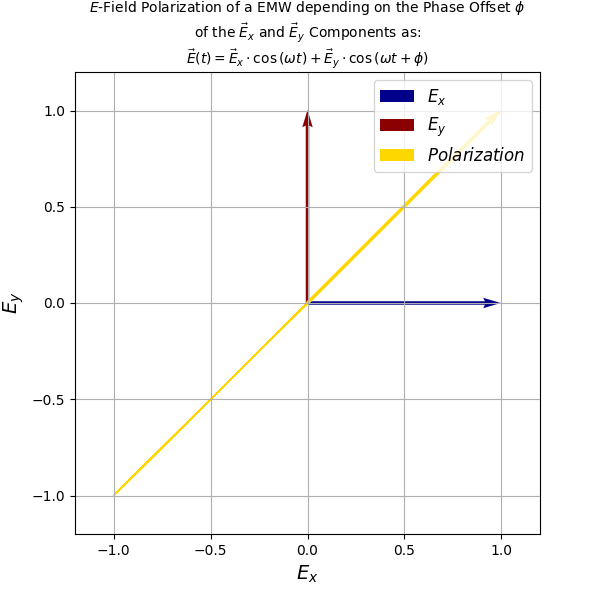

In [2]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid()

def cosine(t: float, omega: float, phi: float = 0):
    return np.cos(omega * t + phi)

t_initial = 0
phi_initial = 0

time_slider = FloatSlider(value=t_initial, min=0, max=20 * np.pi, step=0.1, description='Time [s]')
phi_slider = FloatSlider(value=phi_initial, min=0, max=2 * np.pi, step=0.01, description=r'$\phi$ [rad]')

origin = [0, 0]
efield_x = [1, 0]
efield_y = [0, 1]

ex = ax.quiver(*origin, efield_x[0], efield_x[1], units='xy', scale=1, color='darkblue', linewidth=2, label=r'$E_x$')
ey = ax.quiver(*origin, efield_y[0], efield_y[1], units='xy', scale=1, color='darkred', linewidth=2, label=r'$E_y$')
polarization = ax.quiver(*origin, efield_x[0] + efield_y[0], efield_x[1] + efield_y[1], units='xy', scale=1, color='gold', linewidth=2, label=r'$Polarization$')
shape = [[cosine(t=t, omega=1), cosine(t=t, omega=1, phi=phi_initial)] for t in np.linspace(0, 2 * np.pi, 1000)]
pol_shape = ax.add_patch(mpatches.Polygon(shape, color='gold', linestyle = 'dotted', closed = True, fill = False))

ax.set_title(r'$\vec{E}$-Field Polarization of a EMW depending on the Phase Offset $\phi$' + '\n' + r'of the $\vec{E}_x$ and $\vec{E}_y$ Components as:' +  '\n' r'$\vec{E}(t) = \vec{E}_x \cdot \cos\left(\omega t\right) + \vec{E}_y \cdot \cos\left(\omega t + \phi\right)$', fontsize=10)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel(r'$E_x$', fontsize = 14)
ax.set_ylabel(r'$E_y$', fontsize = 14)
ax.legend(loc='upper right', fontsize=12)
# plt.tight_layout()

@interact(time=time_slider, phi=phi_slider)
def update_cosine(time, phi):
    updated_efield_x = [cosine(t=time, omega=1), 0]
    updated_efield_y = [0, cosine(t=time, omega=1, phi=phi)]
    updated_shape = [[cosine(t=t, omega=1), cosine(t=t, omega=1, phi=phi)] for t in np.linspace(0, 20 * np.pi, 1000)]
    ex.set_UVC(updated_efield_x[0], updated_efield_x[1])
    ey.set_UVC(updated_efield_y[0], updated_efield_y[1])
    polarization.set_UVC(updated_efield_x[0] + updated_efield_y[0], updated_efield_x[1] + updated_efield_y[1])
    pol_shape.set_xy(updated_shape)
    fig.canvas.draw_idle()

